###### In this notebook, First I have done some exploration on the data using matplotlib and seaborn. Then, I use different classifier models to predict the quality of the wine.

1. Logistic regression

2. Random Forest Classifier
 
3. Support Vector Classifier(SVC)

###### then i did some resampling in the given data as the data is imbalanced which gave me some different results.

###### importing required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

In [2]:
data=pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

###### some basic observation of the dataset.

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###### no null values great!!

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


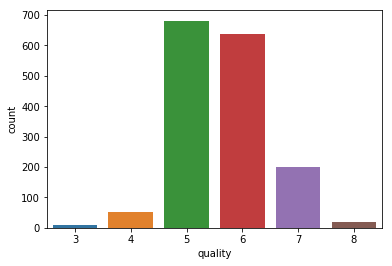

In [9]:
sns.countplot(data['quality'])

as we can see the data is imbalanced .

the quality 5 and 6 of the wine are in large number compared to other qualities.



In [10]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


###### some visualisation between the various features and the quality of the wine.

In [11]:
data_columns=data.columns

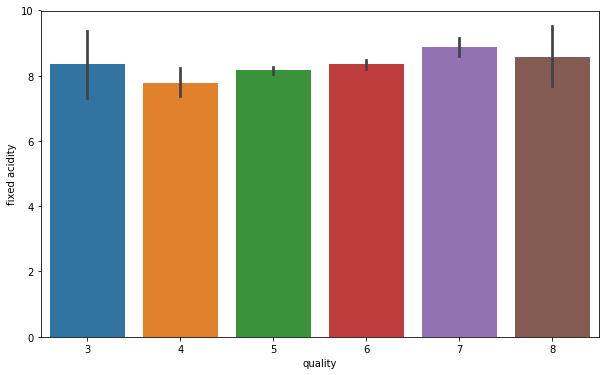

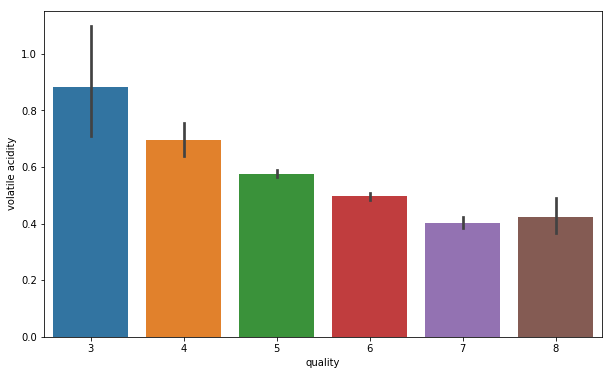

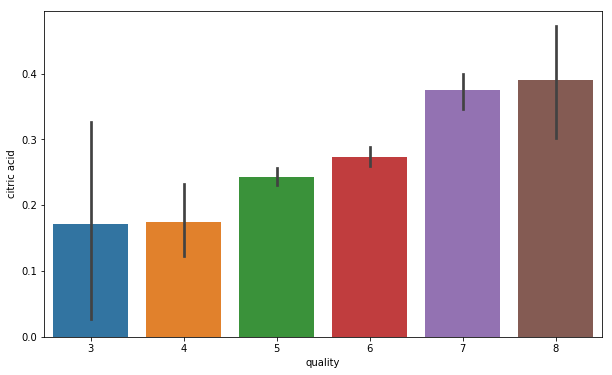

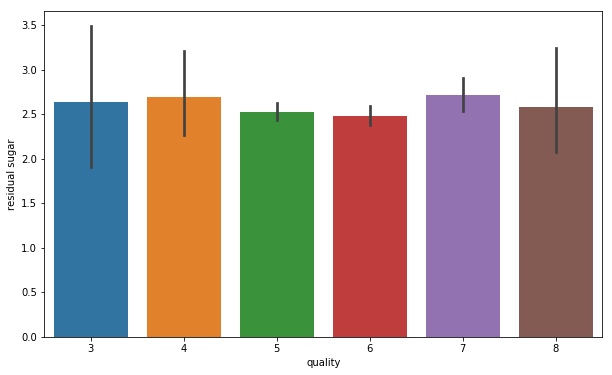

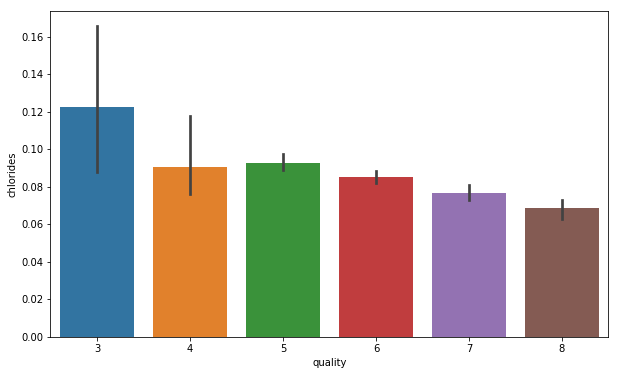

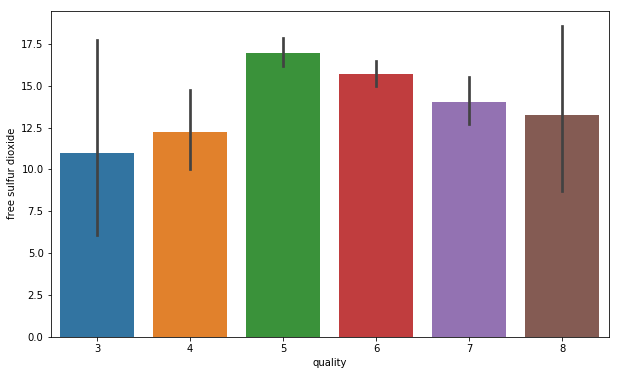

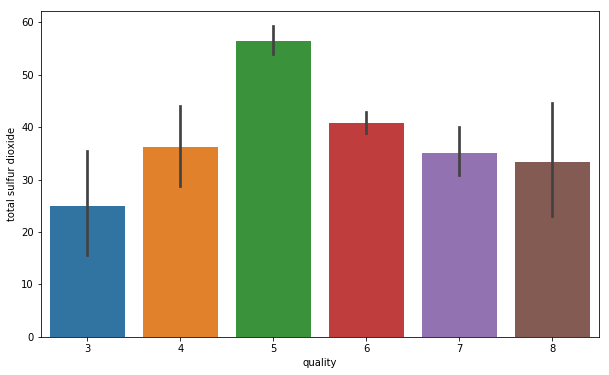

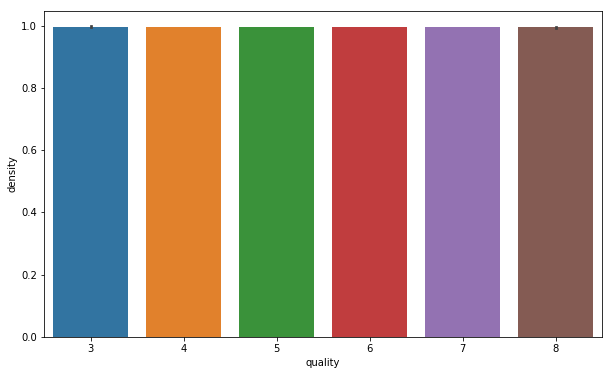

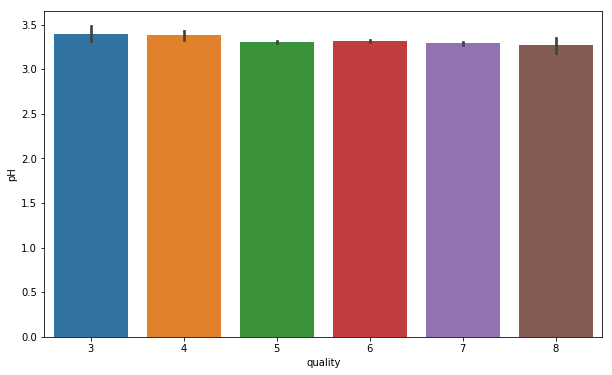

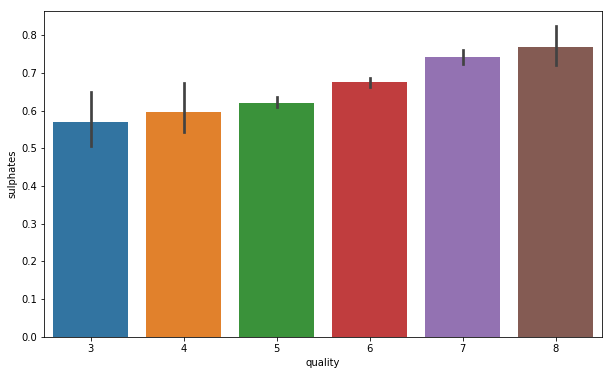

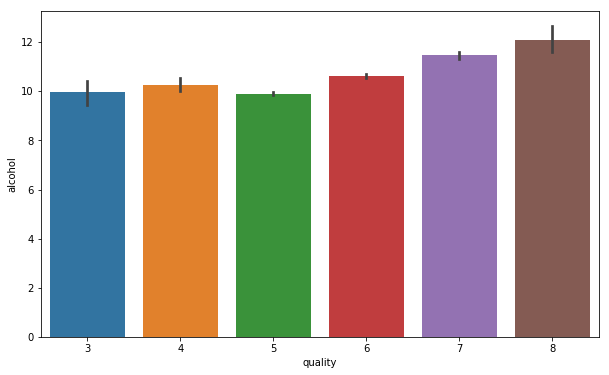

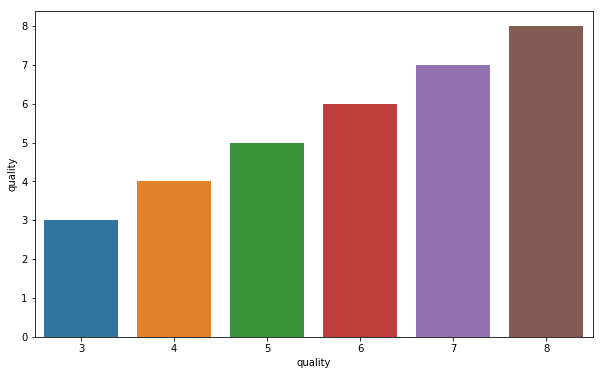

In [12]:
for ele in data_columns:
    fig = plt.figure(figsize = (10,6))
    sns.barplot(x = 'quality', y = ele, data = data)

###### as per the problem statement we have to classify the wine type in two varities good or bad.

###### 1 for good and 0 for bad.

###### the criteria to decide whether it is good or bad is that if the quality score is less than 6.5 it is a bad wine and if it is greater than 6.5 it is considered as good.

###### converting the quality to 0 and 1 depending on their score.

In [13]:
for i in range(1599):
    if(data['quality'][i]<=6.5):
        data['quality'][i]=0
    else:
        data['quality'][i]=1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


###### now we have two varities in our quality column either 0 or 1 and the count of each variety is shown in the countplot .

In [14]:
data['quality'].unique()

array([0, 1])

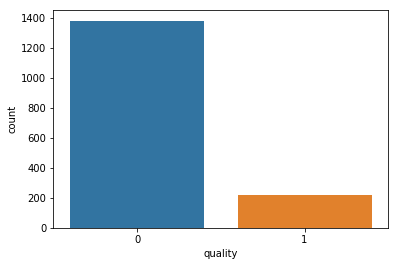

In [15]:
sns.countplot(data['quality'])

###### this data is also imbalanced but lets continue with this data and see what we can do.

###### using logistic regression model .

In [16]:
model=LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=1000)

In [17]:
y=data['quality']
X=data.drop(['quality'],axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [19]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
model.score(X_test,y_test)

0.859375

so thats a very good accuracy with a logistic regression model.

let's try some other methods in the data.

###### using random forest

random forest documentation https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [21]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [22]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       271
           1       0.84      0.53      0.65        49

    accuracy                           0.91       320
   macro avg       0.88      0.76      0.80       320
weighted avg       0.91      0.91      0.90       320



In [23]:
print(confusion_matrix(y_test, pred_rfc))

[[266   5]
 [ 23  26]]


###### using support vector machine
svc documentation https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [24]:
clf = SVC() 

In [25]:
clf.fit(X_train, y_train) 

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
pred_svc=clf.predict(X_test)

In [27]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       271
           1       0.56      0.20      0.30        49

    accuracy                           0.85       320
   macro avg       0.71      0.59      0.61       320
weighted avg       0.82      0.85      0.82       320



In [28]:
print(confusion_matrix(y_test, pred_svc))

[[263   8]
 [ 39  10]]


###### Accuracy from logistic regression is 85.9
###### Accuracy from Random Forest classifier is 91
###### Accuracy from support vector machine is 85

### Resampling
Data imbalance can be treated with resampling the data. data resampling can be of two types.
undersampling and oversampling.

here i am using oversampling.


Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.

###### Collecting all the rows of quality 1 and all the rows of quality 0.

In [29]:
data_1=data[data.quality == 1]

In [30]:
data_0=data[data.quality == 0]

In [31]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 7 to 1584
Data columns (total 12 columns):
fixed acidity           217 non-null float64
volatile acidity        217 non-null float64
citric acid             217 non-null float64
residual sugar          217 non-null float64
chlorides               217 non-null float64
free sulfur dioxide     217 non-null float64
total sulfur dioxide    217 non-null float64
density                 217 non-null float64
pH                      217 non-null float64
sulphates               217 non-null float64
alcohol                 217 non-null float64
quality                 217 non-null int64
dtypes: float64(11), int64(1)
memory usage: 22.0 KB


In [32]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1382 non-null float64
volatile acidity        1382 non-null float64
citric acid             1382 non-null float64
residual sugar          1382 non-null float64
chlorides               1382 non-null float64
free sulfur dioxide     1382 non-null float64
total sulfur dioxide    1382 non-null float64
density                 1382 non-null float64
pH                      1382 non-null float64
sulphates               1382 non-null float64
alcohol                 1382 non-null float64
quality                 1382 non-null int64
dtypes: float64(11), int64(1)
memory usage: 140.4 KB


In [33]:
data_1_new = pd.concat([data_1, data_1],ignore_index=True, sort =False)

###### running the above cell will replicate the data_1 dataframe and thus it will create a dataframe with more rows with the same data.

In [34]:
data_1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 12 columns):
fixed acidity           434 non-null float64
volatile acidity        434 non-null float64
citric acid             434 non-null float64
residual sugar          434 non-null float64
chlorides               434 non-null float64
free sulfur dioxide     434 non-null float64
total sulfur dioxide    434 non-null float64
density                 434 non-null float64
pH                      434 non-null float64
sulphates               434 non-null float64
alcohol                 434 non-null float64
quality                 434 non-null int64
dtypes: float64(11), int64(1)
memory usage: 40.8 KB


###### Concatenating the two dataframes data_1_new and data_0 to create a training dataset for further use

In [35]:
data_new = pd.concat([data_1_new,data_0],ignore_index=True, sort =False)

In [36]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 12 columns):
fixed acidity           1816 non-null float64
volatile acidity        1816 non-null float64
citric acid             1816 non-null float64
residual sugar          1816 non-null float64
chlorides               1816 non-null float64
free sulfur dioxide     1816 non-null float64
total sulfur dioxide    1816 non-null float64
density                 1816 non-null float64
pH                      1816 non-null float64
sulphates               1816 non-null float64
alcohol                 1816 non-null float64
quality                 1816 non-null int64
dtypes: float64(11), int64(1)
memory usage: 170.4 KB


###### using all the above models one by one again on this resampled data.

In [37]:
y_new=data_new['quality']
X_new=data_new.drop(['quality'],axis=1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20)

In [57]:
model=LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=1000)

In [58]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
model.score(X_test,y_test)

0.8598901098901099

In [60]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [61]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       290
           1       0.86      0.92      0.89        74

    accuracy                           0.95       364
   macro avg       0.92      0.94      0.93       364
weighted avg       0.95      0.95      0.95       364



In [44]:
clf = SVC() 

In [45]:
clf.fit(X_train, y_train) 

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
pred_svc_new=clf.predict(X_test)

In [47]:
print(classification_report(y_test, pred_svc_new))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       288
           1       0.65      0.62      0.64        76

    accuracy                           0.85       364
   macro avg       0.78      0.77      0.77       364
weighted avg       0.85      0.85      0.85       364



###### Accuracy from logistic regression is 85.9
###### Accuracy from Random Forest classifier is 95
###### Accuracy from support vector machine is 89

## Looks like resampling the data worked.

# If you like my work give it a thumps UP.